In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("All DataSets/titles.csv",lineterminator='\n')

In [32]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score\r
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,\r
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179\r
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.3\r
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811\r
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.6\r


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
           5850 non-null   object 
dtypes: float64(4), int64(2), object(9)
me

In [15]:
df['genres'].head()

0                              ['documentation']
1                             ['drama', 'crime']
2    ['drama', 'action', 'thriller', 'european']
3                ['fantasy', 'action', 'comedy']
4                              ['war', 'action']
Name: genres, dtype: object

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000


'''Exploration Summary
we have a dataframe consisting of 9827 rows and 9 columns.
our dataset looks a bit tidy with nơ NaNs nor duplicated values.
Release_Date column needs to be casted into date time and to extract only the Overview, Original_Languege and Poster-Url wouldn't be so useful during analys
there is noticable outliers in Popularity column
Vote_Average bettter be categorised for proper analysis.
Genre column has comma saperated values and white spaces that needs to be handled and casted into category'''

In [16]:
### dropping the columns

In [8]:
df = df.drop('description', axis=1,inplace=True)

In [21]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score\r'],
      dtype='object')

In [22]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score\r
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,\r
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,popular,808582.0,40.965,8.179\r
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,popular,107673.0,10.010,7.3\r
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,popular,534486.0,15.461,7.811\r
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,popular,72662.0,20.398,7.6\r


### categorizing the imdb_score  columns
#we would cut the imdb_score values and make four cateogries:popular ,average,below_average,not_popular to describe it more using categorize_col() function.

In [34]:
def categorize_col(df, col, labels):
    # Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop NaN temporarily for calculating edges
    temp = df[col].dropna()

    stats = temp.describe()

    edges = [
        stats['min'],
        stats['25%'],
        stats['50%'],
        stats['75%'],
        stats['max']
    ]

    # Apply binning
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')

    return df


In [35]:
labels = ['not_popular','below_average','average','popular']
df = categorize_col(df, 'imdb_score', labels)
df['imdb_score'].unique()


[NaN, 'popular', 'not_popular', 'average', 'below_average']
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [37]:
df.head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score\r
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,\r
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,popular,808582.0,40.965,8.179\r
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,popular,107673.0,10.010,7.3\r
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,popular,534486.0,15.461,7.811\r
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,popular,72662.0,20.398,7.6\r
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,popular,73424.0,17.617,8.306\r
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,popular,395024.0,17.770,7.8\r
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,popular,155051.0,12.817,7.5\r
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,popular,112048.0,15.687,7.5\r
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,not_popular,69844.0,50.324,6.156\r


In [39]:
df['imdb_score'].value_counts()

imdb_score
not_popular      1414
below_average    1328
popular          1323
average          1302
Name: count, dtype: int64

In [40]:
df.dropna(inplace=True)

df.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score\r            0
dtype: int64

In [41]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score\r
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,popular,73424.0,17.617,8.306\r
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,popular,2151.0,1.487,7.0\r
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,popular,308824.0,130.213,8.301\r
44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,average,34115.0,50.267,7.5\r
45,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'comedy', 'fantasy', '...",['GB'],24.0,tt0086815,below_average,5104.0,42.196,6.5\r


# we had split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [53]:
df['genres']=df['genres'].str.split(', ')

df=df.explode('genres').reset_index(drop=True)
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score\r
0,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,['comedy',['GB'],4.0,tt0063929,popular,73424.0,17.617,8.306\r
1,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,'european'],['GB'],4.0,tt0063929,popular,73424.0,17.617,8.306\r
2,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,popular,2151.0,1.487,7.0\r
3,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,popular,308824.0,130.213,8.301\r
4,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,['scifi',['US'],4.0,tt0083437,average,34115.0,50.267,7.5\r


In [43]:
### casting column into category

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5102 entries, 0 to 5101
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    5102 non-null   object  
 1   title                 5102 non-null   object  
 2   type                  5102 non-null   object  
 3   description           5102 non-null   object  
 4   release_year          5102 non-null   int64   
 5   age_certification     5102 non-null   object  
 6   runtime               5102 non-null   int64   
 7   genres                5102 non-null   category
 8   production_countries  5102 non-null   object  
 9   seasons               5102 non-null   float64 
 10  imdb_id               5102 non-null   object  
 11  imdb_score            5102 non-null   category
 12  imdb_votes            5102 non-null   float64 
 13  tmdb_popularity       5102 non-null   float64 
           5102 non-null   object  
dtypes: category(2), floa

In [61]:
df['genres']=df['genres'].astype('category')
df['genres'].dtypes

CategoricalDtype(categories=[''action'', ''action']', ''animation'', ''animation']',
                  ''comedy'', ''comedy']', ''crime'', ''crime']',
                  ''documentation'', ''documentation']', ''drama'', ''drama']',
                  ''european'', ''european']', ''family'', ''family']',
                  ''fantasy'', ''fantasy']', ''history'', ''history']',
                  ''horror'', ''horror']', ''music'', ''music']', ''reality'',
                  ''reality']', ''romance'', ''romance']', ''scifi'',
                  ''scifi']', ''sport'', ''sport']', ''thriller'',
                  ''thriller']', ''war'', ''war']', ''western'', ''western']',
                  '['action'', '['action']', '['animation'', '['animation']',
                  '['comedy'', '['comedy']', '['crime'', '['crime']',
                  '['documentation'', '['documentation']', '['drama'',
                  '['drama']', '['family'', '['family']', '['fantasy'',
                  '['history'', '['horr

In [65]:
df['genres'].value_counts()


genres
['drama'      366
'drama'       343
'comedy'      239
'action'      215
['comedy'     210
             ... 
['action']      1
['horror']      1
['fantasy'      1
['sport'        1
['scifi']       1
Name: count, Length: 67, dtype: int64

In [63]:
df.nunique()

id                      1709
title                   1704
type                       1
description             1709
release_year              40
age_certification          6
runtime                   92
genres                    67
production_countries     102
seasons                   26
imdb_id                 1709
imdb_score                 4
imdb_votes              1497
tmdb_popularity         1617
tmdb_score\r             185
dtype: int64

In [80]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score\r
0,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,[comedy],['GB'],4.0,tt0063929,popular,73424.0,17.617,8.306\r
1,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,[european],['GB'],4.0,tt0063929,popular,73424.0,17.617,8.306\r
2,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,[comedy],[],1.0,tt0202477,popular,2151.0,1.487,7.0\r
3,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,[comedy],['US'],9.0,tt0098904,popular,308824.0,130.213,8.301\r
4,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,[scifi],['US'],4.0,tt0083437,average,34115.0,50.267,7.5\r


##### data visualization 

In [68]:
sns.set_style('whitegrid')

## what is the most frequent genres of movies released on netflix?

In [69]:
df['genres'].describe()

count         5102
unique          67
top       ['drama'
freq           366
Name: genres, dtype: object

In [75]:
df['genres'] = df['genres'].astype('object')


In [76]:
import ast
import pandas as pd

def safe_parse(x):
    # already list
    if isinstance(x, list):
        return x
    
    # NaN
    if pd.isna(x):
        return []
    
    # If string
    if isinstance(x, str):
        cleaned = x.replace('[', '').replace(']', '').replace('"','').replace("'","")
        return [i.strip() for i in cleaned.split(',') if i.strip()]
    
    return []


In [77]:
df['genres'] = df['genres'].apply(safe_parse)


In [78]:

df_exploded = df.explode('genres')


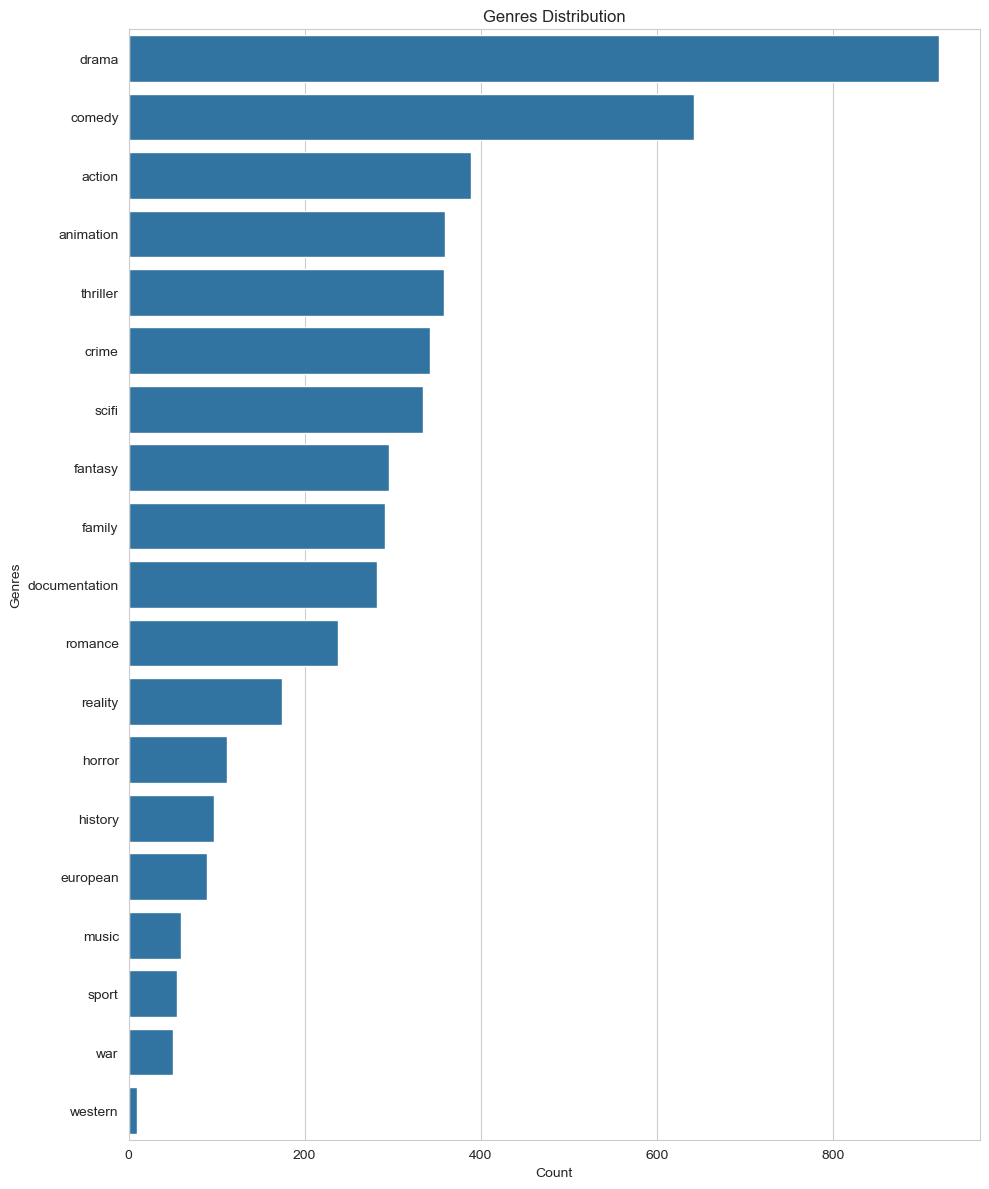

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
sns.countplot(
    data=df_exploded,
    y='genres',
    order=df_exploded['genres'].value_counts().index
)
plt.title("Genres Distribution")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.tight_layout()
plt.show()


#which has highest votes in imdb_score column?

In [81]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score\r
0,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,[comedy],['GB'],4.0,tt0063929,popular,73424.0,17.617,8.306\r
1,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,[european],['GB'],4.0,tt0063929,popular,73424.0,17.617,8.306\r
2,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,[comedy],[],1.0,tt0202477,popular,2151.0,1.487,7.0\r
3,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,[comedy],['US'],9.0,tt0098904,popular,308824.0,130.213,8.301\r
4,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,[scifi],['US'],4.0,tt0083437,average,34115.0,50.267,7.5\r


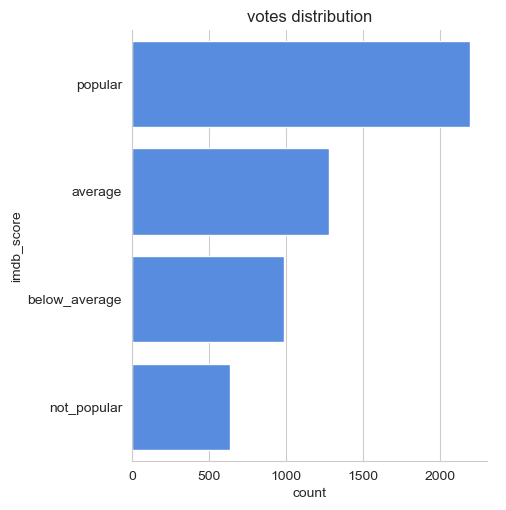

In [82]:
sns.catplot(y='imdb_score',data=df,kind='count',
            order=df['imdb_score'].value_counts().index,
            color='#4287f5')
plt.title('votes distribution')
plt.show()

# what movie got the highest popularity ? what's its genre?

In [84]:
df[df['tmdb_popularity']==df['tmdb_popularity'].max()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score\r
919,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,[scifi],['US'],5.0,tt4574334,popular,1101055.0,2226.231,8.635\r
920,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,[thriller],['US'],5.0,tt4574334,popular,1101055.0,2226.231,8.635\r
921,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,[drama],['US'],5.0,tt4574334,popular,1101055.0,2226.231,8.635\r
922,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,[fantasy],['US'],5.0,tt4574334,popular,1101055.0,2226.231,8.635\r
923,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,[horror],['US'],5.0,tt4574334,popular,1101055.0,2226.231,8.635\r


# what movie got the lowest popularity ? what's its genre?

In [85]:
df[df['tmdb_popularity']==df['tmdb_popularity'].min()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score\r
432,ts13411,Cocaine,SHOW,A three-part documentary series investigating ...,2005,TV-14,49,[documentation],['US'],1.0,tt0907286,average,61.0,0.6,7.0\r
433,ts13411,Cocaine,SHOW,A three-part documentary series investigating ...,2005,TV-14,49,[european],['US'],1.0,tt0907286,average,61.0,0.6,7.0\r
440,ts29199,Monty Python's Personal Best,SHOW,A series of six outrageous one-hour specials s...,2006,TV-PG,56,[comedy],"['US', 'GB']",1.0,tt0795156,popular,441.0,0.6,8.0\r
441,ts29199,Monty Python's Personal Best,SHOW,A series of six outrageous one-hour specials s...,2006,TV-PG,56,[animation],"['US', 'GB']",1.0,tt0795156,popular,441.0,0.6,8.0\r
473,ts29581,Unriddle,SHOW,Detective Hu Xiaoman meets low level criminal ...,2010,TV-14,44,[thriller],['SG'],2.0,tt6194390,popular,25.0,0.6,\r
474,ts29581,Unriddle,SHOW,Detective Hu Xiaoman meets low level criminal ...,2010,TV-14,44,[action],['SG'],2.0,tt6194390,popular,25.0,0.6,\r
475,ts29581,Unriddle,SHOW,Detective Hu Xiaoman meets low level criminal ...,2010,TV-14,44,[drama],['SG'],2.0,tt6194390,popular,25.0,0.6,\r
651,ts158608,The Ultimate Braai Master,SHOW,A South African team competition on open fire ...,2012,TV-PG,45,[reality],['ZA'],5.0,tt3264864,popular,36.0,0.6,\r
912,ts82860,Against the Tide,SHOW,A detective and a psychologist investigating a...,2014,TV-14,44,[drama],['SG'],1.0,tt7131682,popular,11.0,0.6,6.0\r
1424,ts87465,Witch Hunt: A Century of Murder,SHOW,"Four hundred years ago, hundreds of innocent p...",2015,TV-14,46,[documentation],['GB'],1.0,tt6474054,average,324.0,0.6,\r


# which year has the most filmmed movies?

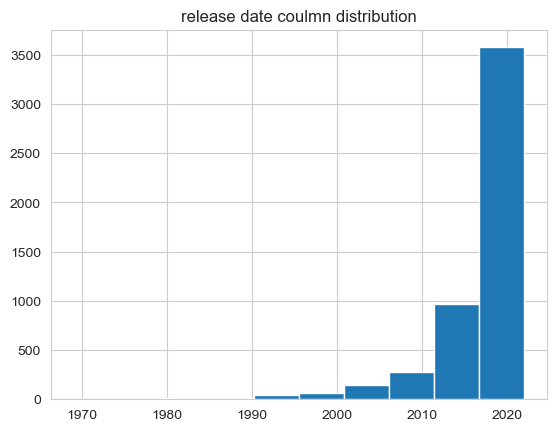

In [86]:
df['release_year'].hist()
plt.title('release date coulmn distribution')
plt.show()

In [87]:
Conclusion:

Q1: What is the most frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.


Q2: What genres has highest votes?

we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

    
Q3: What movie got the highest popularity? what's its genre?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.


Q3: What movie got the lowest popularity? what's its genre?

The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, "uar', 'sci-fi' and 'history'.

Q4: Which year has the most filmmed movies?5

year 2020 has the highest filmming rate in our dataset.

SyntaxError: unterminated string literal (detected at line 13) (3665387249.py, line 13)